# 第32讲 scipy.integrate中的数值积分函数

数值积分有
* 矩形(cumsum)算法、
*  梯形(trapz)算法、
*  simpson(simps)算法、
*  龙伯格格(romberg)算法、
*  高斯(quad)算法

等.

调用scipy.integrate模块中的函数完成数值积分

trapz,cumtrapz,quad,fixed_quad,quadrature,romb,simps,dblquad,tplquad,nquad

##  梯形采样数据求积函数scipy.inegrate.trapz调用举例


$$s=\int_{a}^{b}{f(x)dx}$$
$$s=\int_{0}^{2\pi}{\sqrt{4-2*\cos^{2}(x)}dx}$$

梯形求积=所有采样值之和加上0.5倍的首尾两元素和，最后乘以自变量采样间隔


s1= 10.805064801293192 
s2= 10.805064801293192


C:\Anaconda3\envs\PythonLearn\lib\site-packages\ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


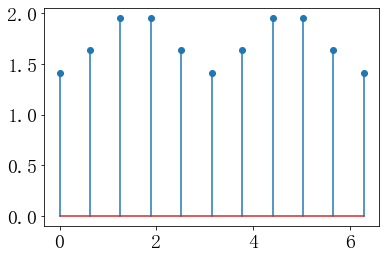

In [23]:
from scipy.integrate import trapz
import numpy as np
import matplotlib.pyplot as plt

a=0;

b=2*np.pi

xs=np.linspace(a,b,11)

ys=np.sqrt(4-2*np.cos(xs)**2)


plt.stem(xs,ys)

h=xs[1]-xs[0]

s1=h*(ys[1:-1].sum()+(ys[0]+ys[-1])/2)   #梯形求积=所有采样值之和加上0.5倍的首尾两元素和，最后乘以自变量采样间隔

s2=trapz(ys,dx=h)

print('s1=',s1,'\ns2=',s2)

## 采样数据累加求积scipy.inegrate.cumtrapz调用举例

对sin(x)在一个周期上做累加积分(即变上限积分的采样：


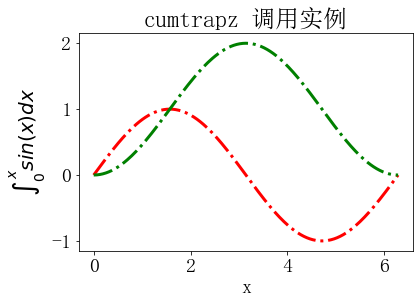

In [26]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.integrate import cumtrapz  #不给初值，返回数据量比自变量少一个

xs=np.linspace(0,2*np.pi,201)
ys=np.sin(xs);

y0=0
s=cumtrapz(ys,xs,initial=y0)  ##

plt.rcParams['font.sans-serif']=['SimSun']
plt.rcParams['font.size']=20
plt.rcParams['axes.unicode_minus']=False

plt.plot(xs,ys,'r-.',xs,s,'g-.',lw=3);

plt.xlabel('x');
plt.ylabel(r'$\int_0^{x}sin(x)dx$')
plt.title('cumtrapz 调用实例');
plt.show()


##  定序高斯求积函数scipy.inegrate.fixed_quad调用举例

s1= 13.998350202172437 
s2= 13.998350182032334


C:\Anaconda3\envs\PythonLearn\lib\site-packages\ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


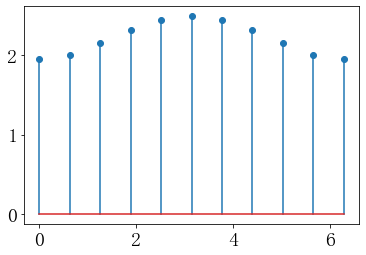

In [28]:
from scipy.integrate import fixed_quad
import numpy as np

def f(x):
    return np.sqrt(5-1.2*np.cos(x))

a=0;
b=2*np.pi

xs=np.linspace(a,b,11)

ys=f(xs)    #np.sqrt(5-1.2*np.cos(xs))

h=xs[1]-xs[0]

s1=h*(ys[1:-1].sum()+(ys[0]+ys[-1])/2)


s2,error=fixed_quad(f,a,b,n=10)

print('s1=',s1,'\ns2=',s2)

## 定容差高斯求积函数scipy.inegrate.quadrature调用举例

In [29]:
from scipy.integrate import quadrature
import numpy as np

def f(x):
    return (1-0.8*np.cos(x))**(-1/2)

a=0;
b=2*np.pi

xs=np.linspace(a,b,201)

ys=f(xs)    #(1-0.8*np.cos(xs))**(-1/2)

h=xs[1]-xs[0]
s1=h*(ys[1:-1].sum()+(ys[0]+ys[-1])/2)

def f(x):
    return (1-0.8*np.cos(x))**(-1/2)

s2,error=quadrature(f,a,b)

print('s1=',s1,'\ns2=',s2)

s1= 7.538904772910711 
s2= 7.538904862191097


## 求积函数scipy.inegrate.quad调用举例

In [30]:
from scipy.integrate import quad

import numpy as np

def f(x):
    return np.cos(x**2)*np.exp(-x)


a=0;b=2*np.pi

xs=np.linspace(a,b,201)

ys=f(xs)    #=np.cos(xs**2)*np.exp(-xs)

h=xs[1]-xs[0]

s1=h*(ys[1:-1].sum()+(ys[0]+ys[-1])/2)



s2,error=quad(f,a,b)
print('s1=',s1,'\ns2=',s2,'\nerror=',error)


s1= 0.535105141329819 
s2= 0.5350247571000395 
error= 1.380165069768792e-08


## 龙伯格采样求积函数scipy.inegrate.romb调用举例

In [34]:
from scipy.integrate import romb
import numpy as np

a=-np.pi;
b=np.pi

xs=np.linspace(a,b,2**9+1)

ys=np.cos(xs**2)*np.exp(-(xs**2))

h=xs[1]-xs[0]

s1=h*(ys[1:-1].sum()+(ys[0]+ys[-1])/2)

s2=romb(ys,dx=h)

print('s1=',s1,'\ns2=',s2)

s1= 1.3770003750553097 
s2= 1.3770003641811879


## 龙伯格求积函数scipy.inegrate.romberg调用举例

In [35]:
from scipy.integrate import romberg
import numpy as np

def ga(x):
    return np.exp(-x**2)/np.sqrt(np.pi)

a=0;

b=50

xs=np.linspace(a,b,2**9+1)

ys=ga(xs)
h=xs[1]-xs[0]
s1=h*(ys[1:-1].sum()+(ys[0]+ys[-1])/2)

s2=romberg(ga,a,b)
print('s1=',s1,'\ns2=',s2)

s1= 0.5 
s2= 0.49999999996591565


## 采样数据Simpson求积函数scipy.inegrate.simps调用举例

In [15]:
from scipy.integrate import simps
import numpy as np

a=0;
b=5

xs=np.linspace(a,b,2**9+1)

ys=np.cos(xs**2)*np.exp(-2*xs)*xs

h=xs[1]-xs[0]

s1=h*(ys[1:-1].sum()+(ys[0]+ys[-1])/2)

print('s1=',s1)

s2=simps(ys,dx=h)

print('s2=',s2)

s1= 0.11608458973362429
s2= 0.11609253709773011


## 二重积分函数scipy.inegrate.dblquad调用举例


$$
s=\int_{a}^{b}{dx}\int_{d(x)}^{u(x)}{f(x,y)dy}$$


$$s=\int_{0}^{2\pi}{dx}\int_{d\sqrt(x)}^{\sqrt{5-\cos(x)}}{2x^2y^{2/3}dy}
=\frac{3}{5}\int_{0}^{2}{x^2((5-\cos(x))^{5/6}-x^{5/6})dx}
$$

In [16]:
from scipy.integrate import dblquad

def f(y,x):
    return 5*y**(2/3)*x**2

def d(x):
    return np.sqrt(x)

def u(x):
    return np.sqrt(5-np.cos(x))

a=0;
b=2*np.pi
xs=np.linspace(a,b,2001)
ys=3*xs**2*((5-np.cos(xs))**(5/6)-xs**(5/6))
h=xs[1]-xs[0]
s1=h*(ys[1:-1].sum()+(ys[0]+ys[-1])/2)

v=dict(epsabs=1e-12,epsrel=1e-12)

s2,error=dblquad(f,a,b,d,u,**v)

print('s1=',s1,'\ns2=',s2,'\nerror=',error)


s1= 25.112170613629345 
s2= 25.112275348409604 
error= 4.087906172593458e-12


## 三重积分函数scipy.inegrate.tplquad调用举例

被积函数中自变量的顺序极为重要，先积分的变量一定先出现。


如果取c1=c2 =c3=0，就给出半径为R的球体体积

In [36]:
from scipy.integrate import tplquad;
import numpy as np

R=10;
a=-R;
b=R; 
c1,c2,c3=1,1,1

def f(z,y,x):
    return c1* x**2+c2*y**2+c3*z**2+1
def g(x):
    return (-1)*np.sqrt(100-x**2)
def h(x):
    return np.sqrt(100-x**2)
def q(y,x):
    return (-1)*np.sqrt(100-x**2-y**2)
def r(y,x):
    return np.sqrt(100-x**2-y**2)

v=dict(epsabs=1e-12,epsrel=1e-12)

s,error=tplquad(f,a,b,g,h,q,r,**v)

print('s=',s,'\nerror=',error)

s= 255516.20249196977 
error= 1.5468685887753963e-08
